In [23]:
import SimpleITK as sitk
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [24]:
def displayImage(image):
    plt.imshow(sitk.GetArrayViewFromImage(image))
    plt.axis("off")
    plt.show()

In [25]:
def downloadImage(path):
    reader = sitk.ImageFileReader()
    reader.SetImageIO("NiftiImageIO")
    reader.SetFileName(path)
    image = reader.Execute()
    return image

In [37]:

interrsect_1_path = '/Users/josephinebregazzi/Work/summer2023/work/Brain-Scan-Example-Data/Intersect/images/INTERRSeCT01-005_FollowUp.nii.gz'
# isles_1_path = '/Users/josephinebregazzi/Work/summer2023/work/Isles-22-Flair-Image-Preprocessing/sub-strokecase0002_ses-0001_flair.nii.gz'
# interrsect_1_path = '/home/jbregazzi/Documents/josephine/Datasets/StrokeLesionSegmentation/flair/interrsect/images/INTERRSeCT01-005_FollowUp.nii.gz'

img_1_skull = downloadImage(interrsect_1_path)

In [38]:
image = img_1_skull

print(image.GetWidth())
print(image.GetHeight())
print(image.GetDepth())

376
512
48


In [39]:
image1 = sitk.GetArrayFromImage(img_1_skull)

print(image1.shape)
# print(image1.GetHeight())
# print(image1.GetDepth())

(48, 512, 376)


In [45]:
image1_0_arr = image1[20]
print(image1_0_arr.shape)

(512, 376)


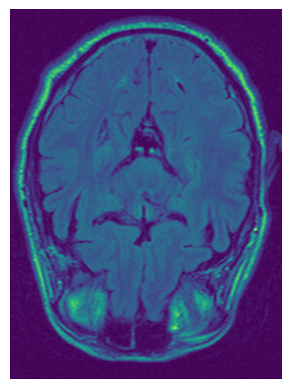

In [46]:
image1_0 = sitk.GetImageFromArray(image1_0_arr)
displayImage(image1_0)

In [47]:
def getArrayOfSlices(image3d):
    array_slices = []
    slices_nda = sitk.GetArrayFromImage(image3d)
    
    for i in range(image3d.GetDepth()):
        array_slices.append(sitk.GetImageFromArray(slices_nda[i]))
    
    return array_slices

In [48]:
img_1_skull_slices = getArrayOfSlices(img_1_skull)

print(len(img_1_skull_slices))

48


In [49]:
def getAveragePixelShade(image):
    image_nda = sitk.GetArrayFromImage(image)
    return np.mean(image_nda)

In [50]:
avg_intensity_1 = getAveragePixelShade(img_1_skull)
print(avg_intensity_1)

176.09470004900126


In [51]:
def myshow(img):
    nda = sitk.GetArrayViewFromImage(img)
    plt.imshow(nda)

def flip_vertical_2d(image):
    return image[::-1, :]
    

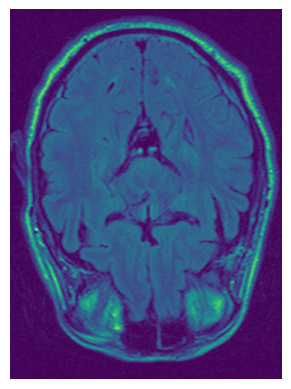

In [52]:
flipped_image1_0 = flip_vertical_2d(image1_0)
displayImage(flipped_image1_0)

In [53]:
def flip_horizontal_2d(image):
    return image[:, ::-1]

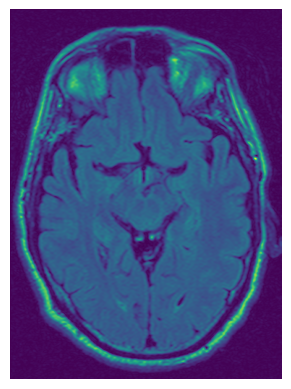

In [54]:
flipped_1_0 = flip_horizontal_2d(image1_0)
displayImage(flipped_1_0)

In [55]:
#displayImage(flipped_1_0 > 300)

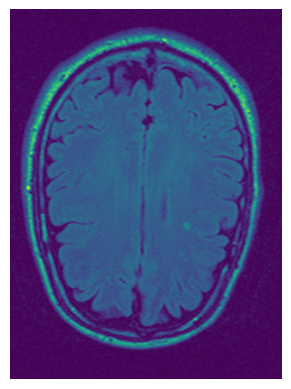

In [56]:
img_1_32 = img_1_skull_slices[32]

displayImage(img_1_32)

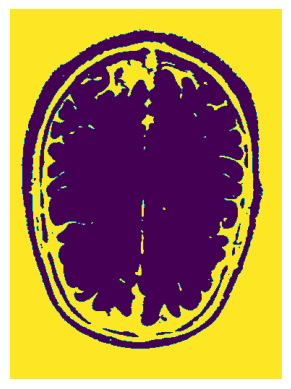

In [57]:
displayImage(img_1_32 > 170 + img_1_32 < 350)

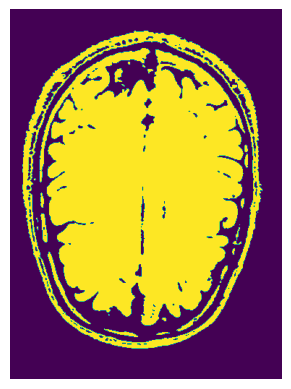

In [58]:
displayImage((img_1_32 > 200) + (img_1_32 < 600))

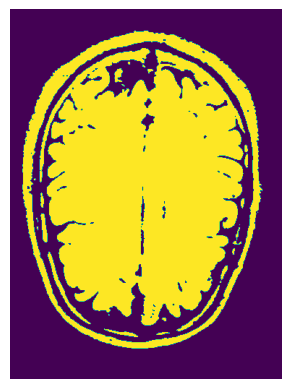

In [59]:
image_1_32_binary = ((img_1_32 > 200) + (img_1_32 <800))
displayImage(image_1_32_binary)

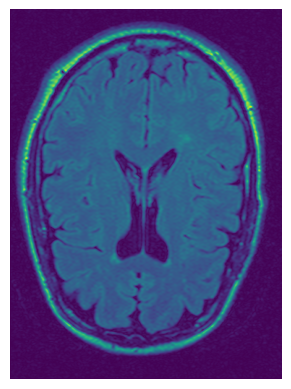

In [70]:
img_1_28 = img_1_skull_slices[28]

displayImage(img_1_28)

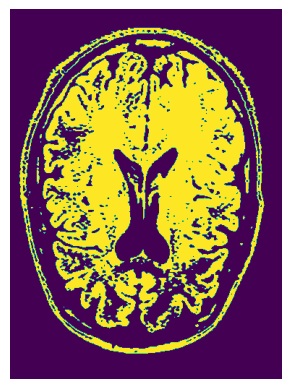

In [74]:
displayImage((img_1_28 > 270) + (img_1_28 < 600))

In [ ]:
def identityTransformation(image):
    '''Input image of dim=0, returns image after identity transformation (no changes)'''
    